In [5]:
import yfinance as yf
import pytz
import pandas as pd
symbol='SNOW'
# Define timezone
et_tz = pytz.timezone("America/New_York")

# Define stock symbol and interval
# symbol = "SNOW"
interval = "1d"  # Supports "1m", "5m", "15m", "30m", "1h", "1d"

# Get historical data
data = yf.download(symbol, interval=interval, period="100d")

# Reset index to include Datetime as a column
data.reset_index(inplace=True)

# Ensure correct column ordering
columns_order = ["Date", "Close", "High", "Low", "Open", "Volume"]
data = data[columns_order]  # Reorder the columns properly

# Save to CSV without extra index
csv_filename = f"{symbol.lower()}-daily.csv"
data.to_csv(csv_filename, index=False)

print(f"Cleaned data saved to {csv_filename}")
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf
# Load data from CSV
filename = f"{symbol.lower()}-daily.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Date"], index_col="Date",skiprows=[1])

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)
print(data.tail(3))  # Show first 10 rows for verification

[*********************100%***********************]  1 of 1 completed

Cleaned data saved to snow-daily.csv
                                Close        High         Low        Open  \
Date                                                                        
2025-03-11 20:00:00-04:00  152.369995  155.845001  151.000000  155.369995   
2025-03-12 20:00:00-04:00  149.830002  151.300003  146.139999  149.949997   
2025-03-13 20:00:00-04:00  155.509995  155.629700  150.768997  151.240005   

                            Volume  
Date                                
2025-03-11 20:00:00-04:00  6264900  
2025-03-12 20:00:00-04:00  5208500  
2025-03-13 20:00:00-04:00  1405768  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf
# Load data from CSV
filename = f"{symbol.lower()}.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime",skiprows=[1])

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)

[*********************100%***********************]  1 of 1 completed


InvalidIndexError: (slice(None, None, None), None)

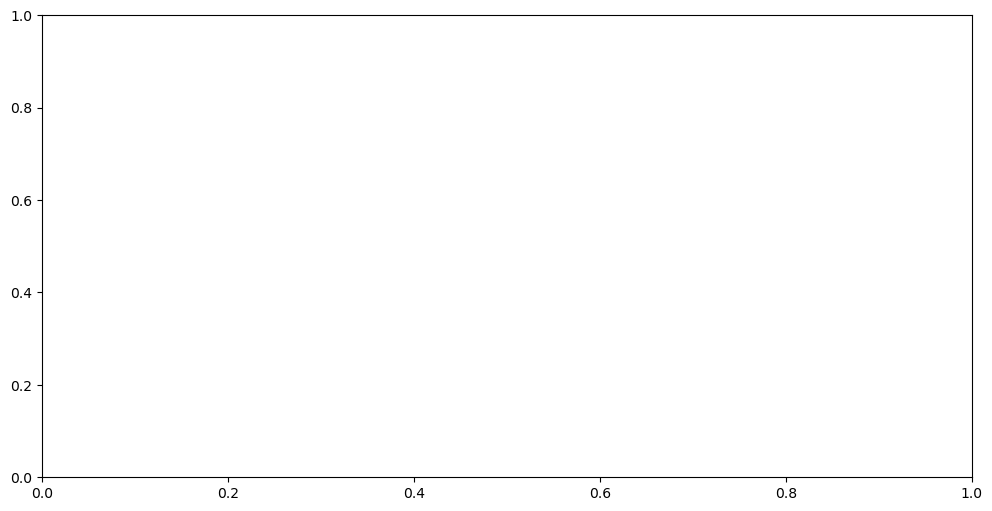

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Fetch the historical data from Yahoo Finance (example: using Apple stock 'AAPL')
ticker = "AAPL"
data = yf.download(ticker, period="10d", interval="1d")  # 10 days of data, daily interval

# Calculate the high, low, and close for the previous 3 days (excluding today)
prevHigh = data['High'].shift(1)  # High of the previous day
prevHigh2 = data['High'].shift(2) # High of the day before previous
prevHigh3 = data['High'].shift(3) # High of 3 days ago
prevLow = data['Low'].shift(1)    # Low of the previous day
prevLow2 = data['Low'].shift(2)   # Low of the day before previous
prevLow3 = data['Low'].shift(3)   # Low of 3 days ago
prevClose = data['Close'].shift(1) # Close of the previous day

# Calculate the highest high and lowest low of the previous 3 days
highestHigh = pd.concat([prevHigh, prevHigh2, prevHigh3], axis=1).max(axis=1)  # Highest high from the last 3 days
lowestLow = pd.concat([prevLow, prevLow2, prevLow3], axis=1).min(axis=1)       # Lowest low from the last 3 days

# Calculate A, B, and d
A = (highestHigh + lowestLow + prevClose) / 3
B = (highestHigh + lowestLow) / 2
d = np.abs(A - B)

# Define the three levels
levelUp = A + d
level = A
levelDown = A - d

# Filter the data to only include rows where the time condition is met
# We'll simulate the condition for the last 10 hours based on the current time
now = datetime.datetime.now()
timeCondition = data.index[-1] >= (now - datetime.timedelta(hours=36))  # Checking if the last data point is within 10 hours



# # Plotting the levels if the time condition is met
# if True:
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot the closing price
#     ax.plot(data.index, data['Close'], label='Closing Price', color='black', alpha=0.5)
    
#     # Plot the calculated levels
#     ax.plot(data.index, levelUp, label="Level Up", color='green', linestyle='--')
#     ax.plot(data.index, level, label="Level", color='blue', linestyle='-')
#     ax.plot(data.index, levelDown, label="Level Down", color='red', linestyle='--')

#     # Add titles and labels
#     ax.set_title(f"{ticker} Stock Levels and Closing Price")
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Price')
    
#     # Rotate date labels for better readability
#     plt.xticks(rotation=45)
    
#     # Add a legend
#     ax.legend()

#     # Show the plot
#     plt.tight_layout()
#     plt.show()
# else:
#     print("Time condition not met")
